<a href="https://colab.research.google.com/github/Ayushman0Singh/BookRecommendation/blob/main/BookRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOK RECOMMENDATION**

# Business Problem

Online book reading and selling websites like Kindle and Goodreads compete against each other on many factors. One of those important factors is their book recommendation system. A book recommendation system is designed to recommend books of interest to the buyer.


The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.I will try to make a recommendation system for our given data set.

In [2]:
#importing necessary libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# we will import libraries further as per need

In [3]:
from google.colab import drive # mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


We have been given 3 data sets, Lets have a look at all the data provided to us and its properties

In [4]:
books = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Books.csv")
users = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Users.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
books.head(4) # checking the head and columns 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [ ]:
books[books['Book-Title'] == 'Now You See Her']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2129,0743482891,Now You See Her,Linda Howard,2003,Pocket Books,http://images.amazon.com/images/P/0743482891.0...,http://images.amazon.com/images/P/0743482891.0...,http://images.amazon.com/images/P/0743482891.0...
10536,0671034057,Now You See Her,Linda Howard,1999,Pocket Books,http://images.amazon.com/images/P/0671034057.0...,http://images.amazon.com/images/P/0671034057.0...,http://images.amazon.com/images/P/0671034057.0...
70044,0671568825,Now You See Her,Linda Howard,1998,Atria,http://images.amazon.com/images/P/0671568825.0...,http://images.amazon.com/images/P/0671568825.0...,http://images.amazon.com/images/P/0671568825.0...
83507,0679415831,Now You See Her,Whitney Otto,1994,Random House Inc,http://images.amazon.com/images/P/0679415831.0...,http://images.amazon.com/images/P/0679415831.0...,http://images.amazon.com/images/P/0679415831.0...
85940,0345378261,Now You See Her,Whitney Otto,1995,Ballantine Books,http://images.amazon.com/images/P/0345378261.0...,http://images.amazon.com/images/P/0345378261.0...,http://images.amazon.com/images/P/0345378261.0...
148242,0743527534,Now You See Her,Linda Howard,2002,Encore,http://images.amazon.com/images/P/0743527534.0...,http://images.amazon.com/images/P/0743527534.0...,http://images.amazon.com/images/P/0743527534.0...


In [ ]:
#dimensions of book dataframe
books.shape

(271360, 8)

In [ ]:
#checking users head/columns
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#checking shape
users.shape

(278858, 3)

In [ ]:
#checking our 3rd data-set
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# dimensions of the 3rd data set
ratings.shape

(1149780, 3)

# Data Cleaning and Feature Engineering

Before moving onto the data visualisation and EDA. First, lets make sure our data is ready to use.


**Checking for null values data**

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#checking the ratings df for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Exploratory Data Analysis

**Rating Distribution**

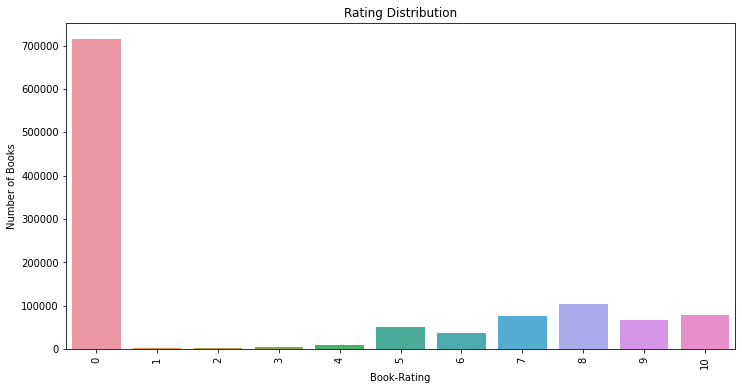

Average rating recieved by all the apps is 2.8669501991685364.


In [ ]:
# show the distribution of rating
plt.figure(figsize=(12, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Books')
plt.show()
print('Average rating recieved by all the apps is {}.'.format(ratings['Book-Rating'].mean()))

Most of the rating are zero



**HYPOTHESIS**: Most of the users are between the age of 20 to 30 

Text(0, 0.5, 'Count')

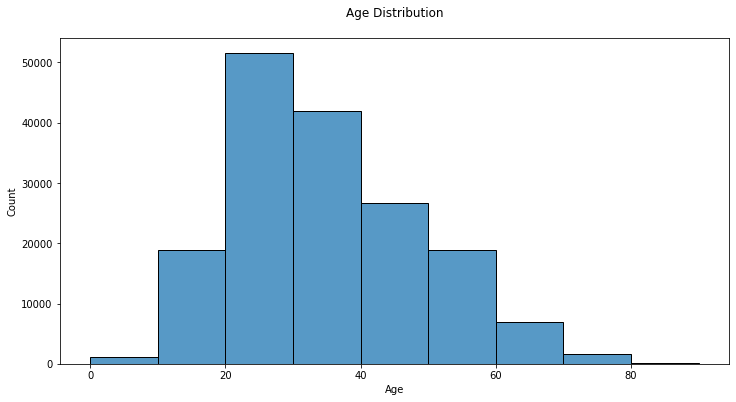

In [ ]:
# plotting the age of thee users 
plt.figure(figsize=(12, 6))
sns.histplot(data=users['Age'], bins=np.arange(0,100,10))
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

# Collaborative filering on full data-set

We will be using Two methods for our Books recommendation system, first we will use a Model Based colaborative model. Then we will also make a memory based Colaboraative recomendation system. We will not be using content based algorithms for recommendation since we do not have enough indivisual features for users and the books. Users only has one extra feature. 

Since we are using content based recomendation systems we are likely to run into the cold start problem. There are many ways to address the cold start problem. we shall deal with them as we design the recoomendation system. 

In [ ]:
# merging the rating and users data frames over the user-id column
user_rating_df = ratings.merge(users, left_on = 'User-ID', right_on = 'User-ID')

In [ ]:
user_rating_df.head(5)

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [ ]:
#merging the user-id ratings df and ISBN of every book with books column over ISBN of each book. 
book_user_rating = books.merge(user_rating_df, left_on = 'ISBN',right_on = 'ISBN')
book_user_rating.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN


Now we have all info in one data frame. For ever book we have a unique rating by a unique user. Dupplicates in ISBN columns indicate multiple users who have read and reated the same book. 

In [ ]:
#only keeping the relevant columns
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
book_user_rating.reset_index(drop=True, inplace = True)

In [ ]:
# creating a dataframe with collected user ids and the books they have rated
interactionsdf = book_user_rating.groupby(['User-ID','ISBN'])['Book-Rating'].sum().reset_index()
print('# of unique user/item interactions: %d' % len(interactionsdf))
interactionsdf

# of unique user/item interactions: 1031136


,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,8,0002005018,5
2,8,0060973129,0
3,8,0374157065,0
4,8,0393045218,0
...,...,...,...
1031131,278854,0425163393,7
1031132,278854,0515087122,0
1031133,278854,0553275739,6
1031134,278854,0553578596,0


Now we will group by user-id and books. For every user, he might have rated multiple books with varying ratings. We will collect all that information together for every user. This will help us make the user item interaction matrix. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


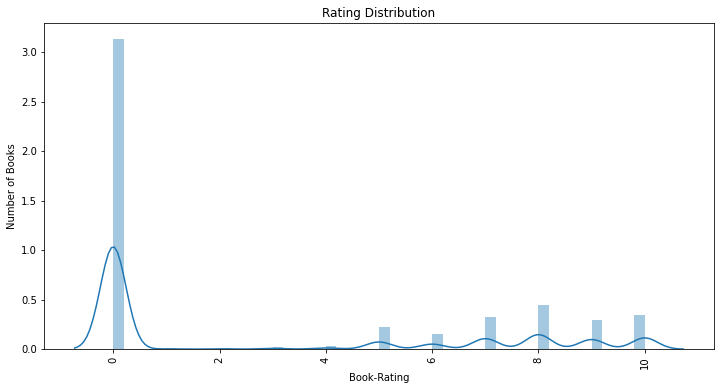

In [ ]:
#checking distribution of Book ratings again to see if there were any changes
plt.figure(figsize=(12, 6))
sns.distplot(a=interactionsdf['Book-Rating'])
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Books')
plt.show()

As we can see there was not much change in the ratings columns which is what we expect, after forming the data frame with all the required information lets now try to make the user-item interaction matrix from this data frame.


In [ ]:
#checking the number of unique books and thier titles 
print(len(book_user_rating['Book-Title'].unique()))
print(len(book_user_rating['ISBN'].unique()))

241071
270151


So we can see here that the number of unique book titles is not equal to the number of ISBN identifiers given in the data frame. This suggests that there are multiple books with the same title but they are essentially different books since thier unique identifier number is different in the data frame. To get an easier understanding of the ISBNs lets create a unique identifier which is simpler to interpret.

In [ ]:
# creating a new unique identifier for books strarting from 0. 
d ={}
for i,j in enumerate(book_user_rating.ISBN.unique()):
    d[j] =i
book_user_rating['unique_id_book'] = book_user_rating['ISBN'].map(d)

We will create unique identifier of every book apart

In [ ]:
book_user_rating.sample(20)

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,unique_id_book
219860,0061000035,The Dark Wind (Jim Chee Novels),Tony Hillerman,55202,0,7246
926847,0373104707,Beloved Vagabond,Anne Hampson,244662,7,186117
427099,0451081641,Damien: Omen II,Harvey Bernhard,31315,0,24614
458676,2253147923,Comment voyager avec un saumon. Nouveaux pasti...,Umberto Eco,85806,0,28453
394239,0156004070,Tennis and the Meaning of Life: A Literary Ant...,Jay Jennings,7915,0,20866
643602,0373169132,The Improperly Pregnant Princess (Harlequin Am...,Jacueline Diamond,131046,0,65606
915418,0785275177,The Biblical Road to Blessing,Benny Hinn,163187,5,178654
26675,044021145X,The Firm,John Grisham,125692,0,456
766572,0743432746,Incas : Book One: The Puma's Shadow,A.B. Daniel,140510,0,103359
993805,0848807006,Cross Creek,Marjorie K. Rawlings,147420,10,236143


In [ ]:
book_user_rating.describe()

,User-ID,Book-Rating,unique_id_book
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,6.721601e+04
std,8.052466e+04,3.854157e+00,7.192401e+04
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,9.288000e+03
50%,1.412100e+05,0.000000e+00,3.740500e+04
75%,2.114260e+05,7.000000e+00,1.058910e+05
max,2.788540e+05,1.000000e+01,2.701500e+05


The total number of unique book ids which me created is same as unique ISBNs. SO the numbers are one to one. Unique book id is just a simpler representation of ISBN. 

My next step was to create a pivot table/ the user item interaction matrix with the given data. BUt I faced many problems relating to RAM over flow. I tried different techniques to create the table in order to prevent that but to no avail.


I tried directly converting the interactions matrix using pivot but it always threw an error since the data is very huge.It gives an error "Unstacked DataFrame is too big, causing int32 overflow". Hence, to create the pivot matrix, we will split the interactions data frame into 10 chunks, make the pivot matrix from each chunk and then stich them up. This way will get a complete user-item interactions matrix without getting an error

In [ ]:
# creating chunks of 5000 rows 
chunk_size = 10000
chunks = [x for x in range(0, book_user_rating.shape[0], chunk_size)]
for i in range(0, len(chunks) - 1):
    print(chunks[i], chunks[i + 1] - 1)

0 9999
10000 19999
20000 29999
30000 39999
40000 49999
50000 59999
60000 69999
70000 79999
80000 89999
90000 99999
100000 109999
110000 119999
120000 129999
130000 139999
140000 149999
150000 159999
160000 169999
170000 179999
180000 189999
190000 199999
200000 209999
210000 219999
220000 229999
230000 239999
240000 249999
250000 259999
260000 269999
270000 279999
280000 289999
290000 299999
300000 309999
310000 319999
320000 329999
330000 339999
340000 349999
350000 359999
360000 369999
370000 379999
380000 389999
390000 399999
400000 409999
410000 419999
420000 429999
430000 439999
440000 449999
450000 459999
460000 469999
470000 479999
480000 489999
490000 499999
500000 509999
510000 519999
520000 529999
530000 539999
540000 549999
550000 559999
560000 569999
570000 579999
580000 589999
590000 599999
600000 609999
610000 619999
620000 629999
630000 639999
640000 649999
650000 659999
660000 669999
670000 679999
680000 689999
690000 699999
700000 709999
710000 719999
720000 729999
730

In [ ]:
# pivot mtrix of all the chunks
user_item_pivot_chunks = [interactionsdf.iloc[ chunks[i]:chunks[i + 1] - 1 ].pivot(index='User-ID', columns='ISBN',  values='Book-Rating') for i in range(0, len(chunks) - 1)]

In [ ]:
# concating the matrices
# pd.concat(user_item_pivot_chunks)

Concating the chucks also lead to RAM overflow issue, We are only provided 12 gigs of RAM collab notebook, and it does seem to run out quickly. I also ran the notebook on a local host with 16gigs of RAM but it still wasnt sufficient. 

Now, I will try a 3rd method to compute our user item interactions matrix. I will use the tqdm library to monitor the progress of my calculations. 

In [ ]:
from tqdm import tqdm # to see the progress
pivot_df = pd.DataFrame()

for i in tqdm(range(0, len(chunks) - 1)):
    chunk_df = book_user_rating.iloc[ chunks[i]:chunks[i + 1] - 1]
    interactions = (chunk_df.groupby(['User-ID','unique_id_book'])['Book-Rating']
      .sum()
      .unstack()
      .reset_index()
      .fillna(0)
      .set_index('User-ID')
    )
    print (interactions.shape)
    pivot_df = pivot_df.append(interactions, sort=False) 

  3%|▎         | 3/103 [00:00<00:07, 13.13it/s]

(6714, 119)
(5718, 188)
(5938, 206)
(5590, 197)
(5874, 296)


  5%|▍         | 5/103 [00:00<00:18,  5.26it/s]

(5699, 207)


  6%|▌         | 6/103 [00:01<00:24,  3.97it/s]

(5775, 250)


  7%|▋         | 7/103 [00:01<00:30,  3.11it/s]

(5534, 243)


  8%|▊         | 8/103 [00:02<00:32,  2.88it/s]

(5778, 274)


  9%|▊         | 9/103 [00:02<00:40,  2.33it/s]

(5586, 316)


 10%|▉         | 10/103 [00:03<00:41,  2.23it/s]

(5483, 348)


 11%|█         | 11/103 [00:03<00:42,  2.15it/s]

(5218, 324)


 12%|█▏        | 12/103 [00:04<00:45,  1.99it/s]

(5641, 369)


 13%|█▎        | 13/103 [00:05<00:53,  1.69it/s]

(5526, 421)


 14%|█▎        | 14/103 [00:06<01:02,  1.43it/s]

(5391, 375)


 15%|█▍        | 15/103 [00:07<01:15,  1.17it/s]

(5693, 356)


 16%|█▌        | 16/103 [00:09<01:39,  1.14s/it]

(5501, 415)


 17%|█▋        | 17/103 [00:10<01:36,  1.13s/it]

(5582, 528)


 17%|█▋        | 18/103 [00:12<02:01,  1.43s/it]

(5727, 414)


 18%|█▊        | 19/103 [00:15<02:37,  1.88s/it]

(4910, 400)


We are still facing some RAM issues, the appending seems to have stopped at 10 percent. We are only able to excecute 18 percent of the code. its not even close to appending all the dataframes. Lets try a different approach, We could use memory based Collaborative filtering methods. 

Model based approach doesnt seem to be possible to execute in a collab notebook with very limited RAM. The data set is too big. We could try to apply some constraints to purify/clean the data-set which will inturn help us reduce the data frame size.  

# Collaborative Filtering Using k-Nearest Neighbors (kNN) / Memory based Model

To reduce the data size we will try to apply certain constraints on the data frame. We can apply many different types of constraints to the dataset. These constraints include:

1. **Popularity Threshold**: Minimum number of user-ratings for a book.
2. **Active user Threshold**: Minimum numer of books read for a unique user to be included in the reccommendation system. 
3. **Regional Recommendation**: We will also recommend stuff regionally. The user will get recommendations from the users of the same location. We will do it for 1 region to not run into memory problems 

Starting from the original data set, we will be only looking at the popular books. In order to find out which books are popular, we combine books data with ratings data.

**Active User Threshold**


Remove users with less than 50 ratings(**inactive users**).

To to that, we will apply value_counts on user-id, each repetation of user means a new rating for a book by the same user. Then we will pick up users with atleast 50 repetions/ratings and filter them in our ratings data frame.
This also makes sure that all our users are consistent readers. 

In [6]:
# checking the number of users and thier number ratings
counts1 = ratings['User-ID'].value_counts()
print(counts1)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64


In [7]:
#keeping users with more than 50 ratings 
counts1_50 = counts1[counts1 >= 50].index # list of user-ids with more than 200 ratings
ratings = ratings[ratings['User-ID'].isin(counts1_50)]  # updating the whole data frame with only users with high ratings

In [8]:
ratings

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
174,276847,3257200552,5
175,276847,3379015180,0
176,276847,3404145909,8
177,276847,3404148576,8
...,...,...,...
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7


In [ ]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
112240       50
206438       50
270801       50
101620       50
265784       50
Name: User-ID, Length: 3427, dtype: int64

In [9]:
# merging rating with users
combine_book_rating = pd.merge(ratings, books,how = 'inner', on='ISBN') #merging two dataframes (inner join since we only want ifo of users with high rating)
columns =['Book-Author',	'Year-Of-Publication',	'Publisher',	'Image-URL-S',	'Image-URL-M',	'Image-URL-L'] #list of unnecessary columns
combine_book_rating = combine_book_rating.drop(columns, axis=1) #droping those columns
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)


**Book Populatity Threshold**

Next we will apply the constraint where we have a minimum number of ratings for a book to be considered in our recomendation system. 

In [10]:
#collecting total rating counts
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title']) # clearing null/nan values from Book-Title
#counting number of ratings for a book and renaming the columns appropiately
book_rating_Count = combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'totalRatingCount'})
book_rating_Count.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [11]:
#combine with main data frame
#use left join since we want rating count for all the books in combined_book_rating column
rating_with_totalRatingCount = combine_book_rating.merge(book_rating_Count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [12]:
# looking at distribution of totalratingsCount
rating_with_totalRatingCount.describe()

,User-ID,Book-Rating,totalRatingCount
count,703434.000000,703434.000000,703434.000000
mean,140983.957487,2.288061,35.008956
std,80538.878058,3.677189,68.959965
min,183.000000,0.000000,1.000000
25%,71207.000000,0.000000,2.000000
50%,142479.000000,0.000000,8.000000
75%,212645.000000,6.000000,34.000000
max,278843.000000,10.000000,852.000000


In [13]:
#checking each quantiles of total ratings count closely
print(rating_with_totalRatingCount['totalRatingCount'].quantile(np.arange(0.1, 1, .05)))

0.10      1.0
0.15      1.0
0.20      2.0
0.25      2.0
0.30      3.0
0.35      4.0
0.40      5.0
0.45      6.0
0.50      8.0
0.55     11.0
0.60     14.0
0.65     19.0
0.70     25.0
0.75     34.0
0.80     47.0
0.85     67.0
0.90    101.0
0.95    164.0
Name: totalRatingCount, dtype: float64


We can see that there are many books with rating count more than ~30 this is just the distribution of total rating count. Lets, consider a threshold required count to be around 50. This will include many popular books which have been read by atleast 50 users. This will also make the opinion of users for a book more concrete, since there will be atleast 50 bad or good ratings for each of the books included.

In [14]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount[rating_with_totalRatingCount['totalRatingCount'] >= 50]
rating_popular_book

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198
...,...,...,...,...,...
702519,274061,1551663147,10,Fever,58
702928,274808,0449701913,0,Homecoming,82
703220,275970,0865714215,0,Stormy Weather,59
703272,275970,1586210661,9,Me Talk Pretty One Day,257


**Country/regional Threshold**

In order to improve computing speed, and not run into the “MemoryError” issue, I will limit our user data to those in the India and US. And then combine user data with the rating data and total rating count data.

Lets have a look at number of users from each of these countries. 

In [ ]:
# checking number of indian locations in the book reading data.
j = 0 #defining a counter
location = []
for i in list(users['Location'].unique()):
  if 'india' in i:  #checking for every written form of the letter India
    j=j+1 #updating ccounter
    location.append(i)
print('number of unique locations from India:', j)
print('location of users in India\n', location) #print all locations in with the term 'india'

number of unique locations from India: 1022
location of users in India
 ['nagpur, idaho, india', 'muncie, indiana, usa', 'mumbai, maharashtra, india', 'hyderabad, alabama, india', 'delhi, delhi, india', 'fishers, indiana, usa', 'indianapolis, indiana, usa', 'lawrenceburg, indiana, usa', 'dahanu, maharashtra, india', 'kolkata, victoria, india', 'tiruchirapalli, n/a, india', 'knox, indiana, usa', 'gurgaon, n/a, india', 'gurgaon, haryana, india', 'nasik, maharashtra, india', 'kannur, kerala, india', 'ernakulam, kerala, india', 'calcutta, west bengal, india', 'varanasi, uttar pradesh, india', 'pune, pune, india', 'solapur, maine, india', 'bangalore, karnataka, india', '16605 bennington ct, indiana, usa', 'new castle, indiana, usa', 'bloomington, indiana, usa', 'mumbai, maharshtra, india', 'pondicherry, jipofuaop, india', 'ranchi, jharkhand, india', 'kanpur, up, india', 'fort wayne, indiana, usa', 'pune, maharashtra, india', 'south bend, indiana, usa', 'hammond, indiana, usa', 'trivandrum, 

In [ ]:
location[2]

'mumbai, maharashtra, india'

The code is includig places in indiana also. we need to correct it. All the locations from Indiana end with 'usa'. lets filter our list again for only indian users.

In [ ]:
strremove = 'usa'
location_updated = []
for sub in location:        
    flag = 0
    if strremove in sub:
        flag = 1
    else:
        location_updated.append(sub)  
len(location_updated) # number of unique locations from India 

617

In [ ]:
j1 = 0 #defining a counter
for i in list(users['Location'].unique()):
  if 'usa' in i:  #checking for every written form of the letter India
    j1=j1+1 #updating ccounter
print('number of entries from US:', j1)

number of entries from US: 18680


In [ ]:
#mergeing the books+ratings data frame with the user info data frame
combined = rating_popular_book.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
# users with location as India or US 
india_us_user_rating = combined[combined['Location'].str.contains("india|usa")]
india_us_user_rating= india_us_user_rating.drop('Age', axis=1)
india_us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"los angeles, california, usa"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"providence, rhode island, usa"
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"


**Implementing KNN**

We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

NearestNeighbors(algorithm='brute', metric='cosine')

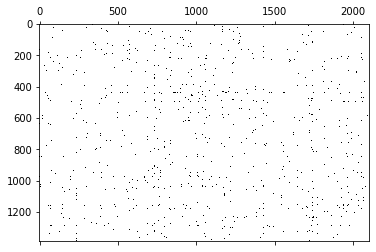

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

india_us_user_rating = india_us_user_rating.drop_duplicates(['User-ID', 'Book-Title'])  #dropping duplicates since we dont need it in the pivot matrix
india_us_user_rating_pivot = india_us_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0) #filling nan values with zeroes
plt.spy(india_us_user_rating_pivot) #checking the non-zero values in the matrix
india_us_user_rating_matrix = csr_matrix(india_us_user_rating_pivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(india_us_user_rating_matrix)

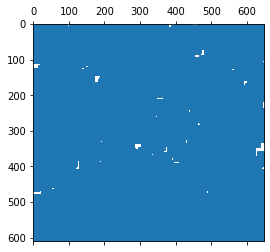

In [ ]:
plt.spy(india_us_user_rating_matrix)

In [ ]:
india_us_user_rating_pivot.shape[1]

2105

In [ ]:
random_userbook_rating_index = np.random.choice(india_us_user_rating_pivot.shape[0]) #pick a random row from the pivot table
distances, indices = model_knn.kneighbors(india_us_user_rating_pivot.iloc[random_userbook_rating_index,].values.reshape(1, -1), n_neighbors = 6) # provide the row as features to the kNN
for i in range(0, len(distances.flatten())):   #loop through all the recomendations
    if i == 0:  #selected book 
        print('Recommendations for {0}:\n'.format(india_us_user_rating_pivot.index[random_userbook_rating_index])) 
    else:  
        #recomendations based on cosine distance of the books from selected book
        print('{0}: {1}, with distance of {2}:'.format(i,india_us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for The Kiss:

1: The Ghost, with distance of 0.831207110287984:
2: Thurston House, with distance of 0.8344031004591668:
3: Feast of All Saints, with distance of 0.8370400466972397:
4: Palomino, with distance of 0.8494646251277383:
5: Bittersweet, with distance of 0.8497964644129433:


In [ ]:
random_userbook_rating_index = np.random.choice(india_us_user_rating_pivot.shape[0]) #pick a random row from the pivot table
distances, indices = model_knn.kneighbors(india_us_user_rating_pivot.iloc[random_userbook_rating_index,].values.reshape(1, -1), n_neighbors = 6) # provide the row as features to the kNN
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(india_us_user_rating_pivot.index[random_userbook_rating_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,india_us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Angela's Ashes: A Memoir:

1: The Crimson Petal and the White, with distance of 0.21432579868161383:
2: C Is for Corpse (Kinsey Millhone Mysteries (Paperback)), with distance of 0.6034547223227122:
3: The No. 1 Ladies' Detective Agency (Today Show Book Club #8), with distance of 0.6428458944403548:
4: We Were the Mulvaneys, with distance of 0.6631392315733924:
5: The Bridges of Madison County, with distance of 0.6956521739130435:


We have sucessfully impleted collaborative filering using KNN. The user-interacction matrix that we ended up with was quite small after all the constraints. Lets try to implement KNN again **without any regional constraints**. 

This time we will apply the **matrix-factorisation method/SVD** method for recommendations. We will assume some latent interactions between the users and items. Then we will try to come up with the user item interaction matrix by ourselves in the process we would be filling the non-interacted items with a rating. We can rank these up for the best recommendations. 

### Implementing **Matrix Factorisation** without regional constraints. 

In [15]:
# droping duplicates in popular books/ratings matrix before applying any regional constraints 
rating_popular_book.drop_duplicates(['User-ID','Book-Title'], inplace = True)  #  we will be using this matrix for the matrix factorisation method. 
rating_popular_book

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198
...,...,...,...,...,...
702519,274061,1551663147,10,Fever,58
702928,274808,0449701913,0,Homecoming,82
703220,275970,0865714215,0,Stormy Weather,59
703272,275970,1586210661,9,Me Talk Pretty One Day,257


Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


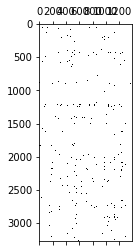

In [16]:
#Creating a sparse pivot table with users in rows and items in columns
pivot_matrix_allregions = rating_popular_book.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
plt.spy(pivot_matrix_allregions)
pivot_matrix_allregions

In [17]:
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(pivot_matrix_allregions, k = NUMBER_OF_FACTORS_MF)

In [18]:
#checking shapes
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(3274, 15)
(15,)
(15, 1388)


In [19]:
sigma

array([115.12501951, 116.36171955, 116.80046523, 118.95432771,
       121.19013925, 127.13769336, 134.23052626, 136.31098921,
       138.32952988, 148.48362129, 156.10432821, 172.66282343,
       186.98302268, 192.06270594, 340.64594931])

Sigma here is an 1-d array with 15 elements we need to convert it to a diagonal matrix so that the matrix multiplication goes smoothly and the dimensions are correct.

In [20]:
#making sigma a diagonal matrix
sigma = np.diag(sigma)

In [21]:
#reconstructing the original matrix without any zeros 
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings 

array([[ 0.16415413,  0.03067265,  0.07222546, ...,  0.05693079,
         0.01561728, -0.04898632],
       [-0.08873663,  0.35064616, -0.02509783, ...,  0.02281492,
        -0.019533  ,  0.30294171],
       [ 0.60241483, -0.05648183,  0.07194772, ...,  0.08126425,
        -0.06358484,  0.27811497],
       ...,
       [ 0.16958525,  0.3227549 , -0.05317516, ..., -0.03672524,
        -0.02569216,  0.40692372],
       [-0.03703911,  0.0917412 ,  0.00675563, ..., -0.11245453,
         0.1613536 ,  0.0463113 ],
       [ 0.14208948,  0.05700115, -0.01009329, ...,  0.04484484,
         0.08500884, -0.04653577]])

In [22]:
#checking if martix shape is same as the original matrix
all_user_predicted_ratings.shape

(3274, 1388)

In [26]:
# converting back to a dataframe
# defining index as book-title
# defining the columns as all the filtered user-ids
prediction_df = pd.DataFrame(all_user_predicted_ratings.transpose(), index= pivot_matrix_allregions.columns, columns=pivot_matrix_allregions.index) 

In [29]:
prediction_df.head()

User-ID,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.164154,-0.088737,0.602415,-0.011097,0.0,0.334021,0.015647,0.010039,0.134607,0.300117,...,-0.011434,-0.133276,-0.029212,0.258105,0.0,-0.032869,-0.006548,0.169585,-0.037039,0.142089
1st to Die: A Novel,0.030673,0.350646,-0.056482,0.217975,0.0,0.106540,0.005456,0.006006,-0.099456,-0.106363,...,-0.044652,0.162143,0.513646,-0.171629,0.0,0.060734,0.015371,0.322755,0.091741,0.057001
2010: Odyssey Two,0.072225,-0.025098,0.071948,-0.062090,0.0,-0.011108,0.004880,0.004321,0.187762,0.100899,...,-0.024002,-0.061971,0.024758,0.026329,0.0,0.068886,0.122701,-0.053175,0.006756,-0.010093
204 Rosewood Lane,-0.016642,-0.013022,0.098709,0.112648,0.0,0.371289,-0.003697,-0.000638,-0.056543,-0.062064,...,-0.015283,0.006378,0.086302,-0.009073,0.0,-0.005617,0.027261,0.178732,0.134950,-0.015714
24 Hours,0.004937,0.002924,0.044351,0.020586,0.0,0.107162,0.001590,0.002077,0.068308,0.002651,...,-0.002137,-0.011128,0.044150,0.002184,0.0,0.011079,-0.017026,0.095637,-0.085772,-0.021162


Now we have all the potential ratings for all the items and users. All thats left is to pick up these ratings of previously uninteracted items for each indivisual user and sort them in descending order to have a recommendation list for that user. 

I will attempt to build a recommender class like the one that we made in class to do the above mentioned task.

In [55]:
prediction_df[243].sort_values(ascending=False)

Book-Title
The Red Tent (Bestselling Backlist)                             0.995270
The Secret Life of Bees                                         0.861241
A Painted House                                                 0.836841
The Lovely Bones: A Novel                                       0.761417
Divine Secrets of the Ya-Ya Sisterhood: A Novel                 0.759460
                                                                  ...   
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)   -0.286229
Seven Up (A Stephanie Plum Novel)                              -0.309847
The Return of the King (The Lord of the Rings, Part 3)         -0.341634
The Two Towers (The Lord of the Rings, Part 2)                 -0.480231
The Fellowship of the Ring (The Lord of the Rings, Part 1)     -0.504075
Name: 243, Length: 1388, dtype: float64

In [56]:
 a = pivot_matrix_allregions.loc[243,:].reset_index()

<bound method DataFrame.value_counts of                                              Book-Title  243
0                                                  1984  0.0
1                                   1st to Die: A Novel  0.0
2                                     2010: Odyssey Two  0.0
3                                     204 Rosewood Lane  0.0
4                                              24 Hours  0.0
...                                                 ...  ...
1383                                    Year of Wonders  0.0
1384                                   You Belong To Me  0.0
1385  Zen and the Art of Motorcycle Maintenance: An ...  0.0
1386                                               Zoya  0.0
1387                                \O\" Is for Outlaw"  0.0

[1388 rows x 2 columns]>

In [63]:
a[a[243]>0.1]['Book-Title']

31                                     A Map of the World
32                                        A Painted House
197     Chicken Soup for the Soul (Chicken Soup for th...
589                                   Manhattan Hunt Club
593                                Me Talk Pretty One Day
773                                 River, Cross My Heart
939                                        The Bean Trees
1049                               The General's Daughter
1058                              The God of Small Things
1134                                    The Midnight Club
1154                                          The Patient
1161                           The Pilot's Wife : A Novel
1318                                   Unnatural Exposure
1324                                             Vanished
Name: Book-Title, dtype: object

In [64]:
a[a[243]>0.1]

,Book-Title,243
31,A Map of the World,7.0
32,A Painted House,7.0
197,Chicken Soup for the Soul (Chicken Soup for th...,5.0
589,Manhattan Hunt Club,6.0
593,Me Talk Pretty One Day,9.0
773,"River, Cross My Heart",7.0
939,The Bean Trees,10.0
1049,The General's Daughter,9.0
1058,The God of Small Things,7.0
1134,The Midnight Club,6.0


In [59]:
 a[243].value_counts()

0.0     1374
7.0        4
9.0        4
6.0        3
5.0        1
10.0       1
8.0        1
Name: 243, dtype: int64

,Book-Title,243
0,1984,0.0
1,1st to Die: A Novel,0.0
2,2010: Odyssey Two,0.0
3,204 Rosewood Lane,0.0
4,24 Hours,0.0
...,...,...
1383,Year of Wonders,0.0
1384,You Belong To Me,0.0
1385,Zen and the Art of Motorcycle Maintenance: An ...,0.0
1386,Zoya,0.0


In [ ]:
class Recommender:
    model_name = 'Collaborative filtering(matrix factorisation)'
    def __init__(self, ):
        pass